# Scipy 2

## Interpolación (scipy.interpolate)	

La interpolación es el proceso de encontrar un valor entre dos puntos en una línea o una curva. La interpolación, no solo es útil en estadísticas, sino que también es útil en ciencia, negocios o cuando existe la necesidad de predecir valores que caen dentro de dos puntos de datos existentes.

__Ejemplo:__ Vamos a crear un conjunto de datos y luego vamos a hacer interpolaciones de varios tipos sobre ellos.

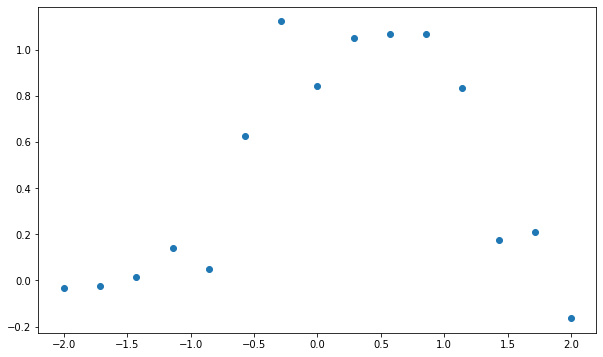

In [1]:
#Importamos los modulos necesarios
import numpy as np
import matplotlib.pyplot as plt

#Creamos un conjunto de datos
N=15
x = np.linspace(-2, 2, N)
y = np.exp(-x**4+x**3) + 0.1*np.random.randn(N)

# Grafiquemos
fig, ax = plt.subplots(figsize=(10, 6))

# los valores de x e y
ax.plot(x, y,'o')

plt.show()

### Interpolación 1-D

La clase `interp1d` en `scipy.interpolate` es un método conveniente para crear una función basada en puntos de datos fijos, que se pueden evaluar en cualquier lugar dentro del dominio definido por los datos dados mediante interpolación de tipo  `‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, ‘next’`.

Al utilizar los datos anteriores, creemos una función de interpolación lineal y cubica y dibujemos un nuevo gráfico interpolado.

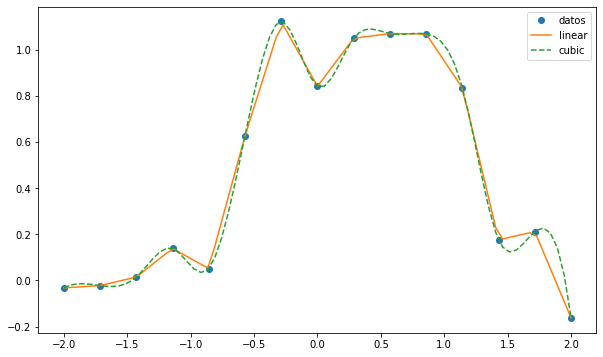

In [2]:
#importamos la funcion interp1d
from scipy.interpolate import interp1d
f1 = interp1d(x, y,kind = 'linear')
f2 = interp1d(x, y, kind = 'cubic')

#Ahora grafiquemos
fig1, ax1 = plt.subplots(figsize=(10, 6))
#Primero debo de crear un arreglo lienal para plotear las funciones f1 y f2
#Con el mismo rango pero mas puntos para que se vea suave
xlin = np.linspace(-2,2,5*N)

# los valores de x e y
ax1.plot(x, y,'o')
# los valores de xlin y f1
ax1.plot(xlin, f1(xlin),'-')
# los valores de xlin y f2
ax1.plot(xlin, f2(xlin),'--')
#Creamos una leyenda para que la grafica se entienda
plt.legend(['datos', 'linear', 'cubic'], loc = 'best')
plt.show()

### Splines

Para dibujar curvas suaves a través de puntos de datos, los dibujantes usan tiras delgadas y flexibles algun material llamadas _Splines_ mecánicas. 

#### Spline univariante
La spline de suavizado unidimensional se ajusta a un conjunto determinado de puntos de datos. La clase `UnivariateSpline` en `scipy.interpolate` es un método conveniente para crear una función, basada en la clase de puntos de datos fijos, la sintaxis es la siguiente

>```scipy.interpolate.UnivariateSpline (x, y, w = None, bbox = [None, None], k = 3, s = Ninguno, ext = 0, check_finite = False)```

__Parámetros:__ 

`W`: especifica los pesos para el ajuste. Debe ser positivo. Si no hay ninguno (predeterminado), todos los pesos son iguales.

`S`: especifica el número de puntos especificando una condición de suavizado.

`K`: grado de suavizado de spline. Debe ser $<= 5$. El valor predeterminado es $k = 3$, una spline cúbica.

`Ext`: controla el modo de extrapolación de los elementos que no están en el intervalo definido por la secuencia de puntos.

* si ext = 0 o "extrapolar", devuelve el valor extrapolado.
* si ext = 1 o "cero", devuelve 0
* si ext = 2 o 'raise', genera un ValueError
* si ext = 3 de "const", devuelve el valor de límite.

`check_finite`: si se debe verificar que las matrices de entrada contienen solo números finitos.

__Ejemplo:__ Utilicemos la función gaussiana pero introduciendo una gran amplitud en el ruido

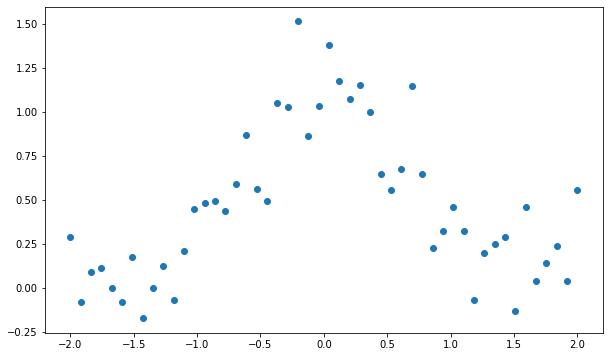

In [3]:
#Importamos los modulos necesarios
import numpy as np
import matplotlib.pyplot as plt

#Creamos un conjunto de datos
N=50
x = np.linspace(-2, 2, N)
y = np.exp(-x**2) + 0.2*np.random.randn(N)

# Grafiquemos
fig2, ax2 = plt.subplots(figsize=(10, 6))
# los valores de x e y
ax2.plot(x, y,'o')
plt.show()

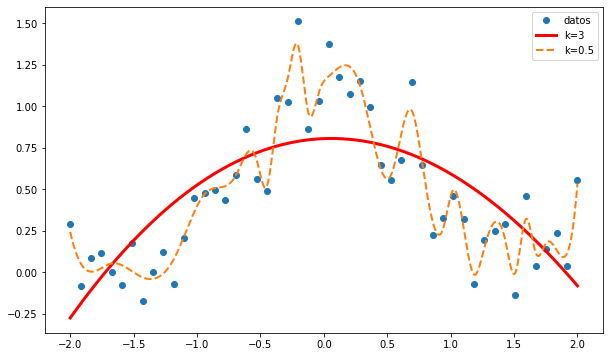

In [4]:
from scipy.interpolate import UnivariateSpline
#Usando los valores por defecto de spline para interpolar los puntos
spl = UnivariateSpline(x, y)
#Creo un arreglo lienal para plotear las funciones
xs = np.linspace(-2, 2, N*100)
#Grafico sobre el anterior
fig3, ax3 = plt.subplots(figsize=(10, 6))
# los valores de x e y
ax3.plot(x, y,'o')
# UnivariateSpline
ax3.plot(xs, spl(xs), 'r', lw = 3)
#Ahora cambiando los valores de k
spl.set_smoothing_factor(0.5)
ax3.plot(xs, spl(xs), '--',linewidth=2)
#Creamos una leyenda
plt.legend(['datos', 'k=3', 'k=0.5'], loc = 'best')
plt.show()

### Interpolador en 2D

El modulo `scipy.interpolate` también contiene un interpolador de funciones en 2D llamado `scipy.interpolate.griddata`. Cuya sintaxis es la siguiente

>``` scipy.interpolate.griddata(points, values, xi, method='linear', fill_value=nan, rescale=False)```

donde `xi` son un arreglo 2-D de flots, que son los puntos en los que interpolar datos.

__Ejemplo 2:__ Inspirado en un ejemplo de *scipython* Segunda edición

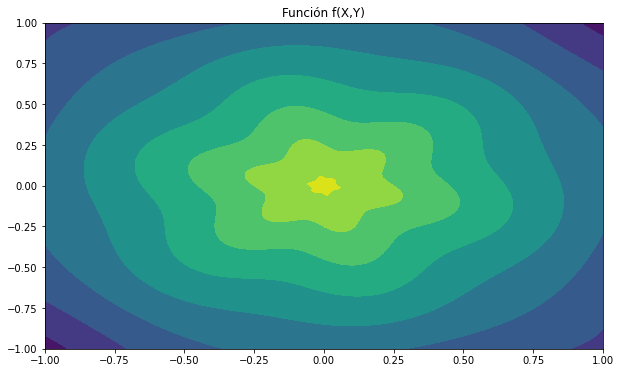

In [6]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Creo los puntos de muestreo en el eje x e y
x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
#Creo matrices de coordenadas a partir de vectores de coordenadas
X, Y = np.meshgrid(x,y)

# Creo una funcion modelo en dos dimensiones
def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

# Evaluo los puntos del grid en la funcion del modelo
T = f(X, Y)
# Grafico la funcion
fig0, ax0 = plt.subplots(figsize=(10, 6))
# Plot the model function and the randomly selected sample points
ax0.contourf(X, Y, T)
ax0.set_title('Función f(X,Y)')
plt.show()

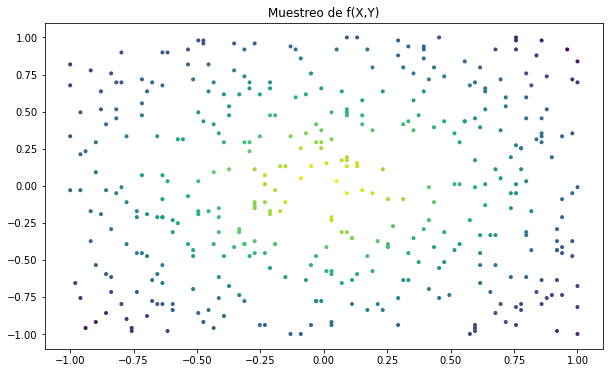

In [26]:
# Ahora voy a escojer puntos aleatorios del dominio de la funcion del modelo
#Numero de puntos
npts = 400
#random.choice escoje del conjunto x (o y) un npts aleatorio
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

#Graficamos estos puntos
fig1, ax1 = plt.subplots(figsize=(10, 6))
# el color se selecciona usando la funcion del modelo
ax1.scatter(px, py, c=f(px, py), marker='.')
ax1.set_title('Muestreo de f(X,Y)')
plt.show()

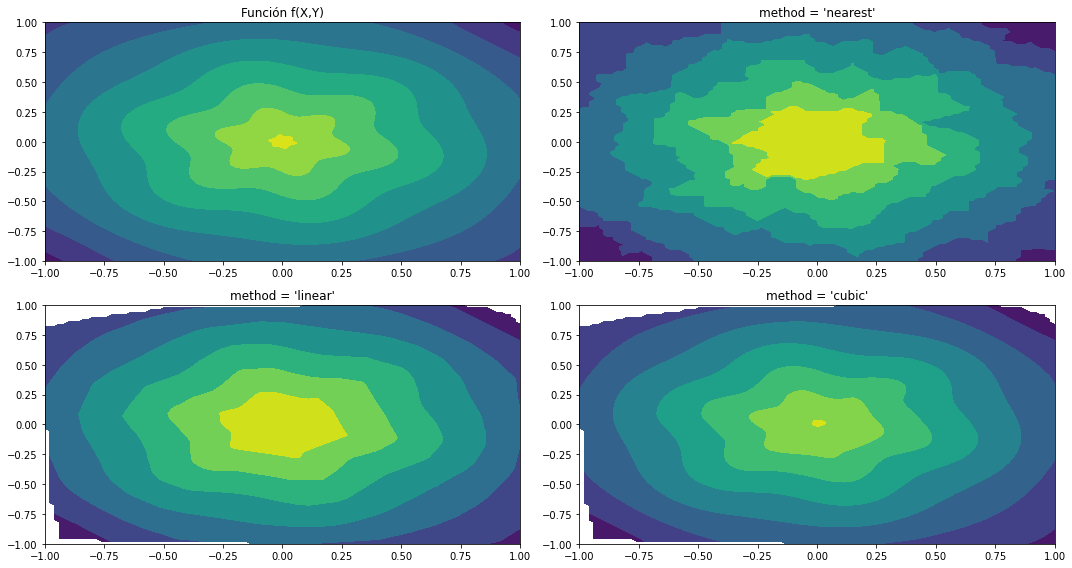

In [27]:
#Creamos los subplots para graficar
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15, 8))
#Usando un for vamos a interpolar usando los tres diferentes metodos y graficamos
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    #Para producir los indices de los subplots
    r, c = (i+1) // 2, (i+1) % 2
    #Grafico
    ax[r,c].contourf(X, Y, Ti)
    #Pongo los titulos
    ax[r,c].set_title("method = '{}'".format(method))

#En el primer subplot pongo la funcion original
ax[0,0].contourf(X, Y, T)
ax[0,0].set_title('Función f(X,Y)')

plt.tight_layout()
plt.show()

## scipy.stats	Statistics

In [1]:
casca

NameError: name 'casca' is not defined